In [1]:
# Dataset: wisc_bc_data.csv
# Location: https://mitu.co.in/dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Read the dataset

In [3]:
df = pd.read_csv('wisc_bc_data.csv')

In [4]:
df.shape

(569, 32)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Get input and output data

In [8]:
x = df.drop(['id','diagnosis'], axis = 1)
y = df['diagnosis']

In [9]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Cross validation

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, stratify=y)

In [13]:
x_train.shape

(426, 30)

In [14]:
x_test.shape

(143, 30)

### Build the ML model

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [17]:
y_pred = clf.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.958041958041958

### Normalize the data

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

### Apply PCA

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

In [24]:
pca.explained_variance_ratio_

array([5.30976894e-01, 1.72834896e-01, 7.11444201e-02, 6.41125883e-02,
       4.08607204e-02, 3.07149442e-02, 1.58083746e-02, 1.19147161e-02,
       9.88429103e-03, 9.45446106e-03, 8.49396551e-03, 7.57976457e-03,
       6.56638137e-03, 4.74811462e-03, 2.69423338e-03, 2.57754484e-03,
       1.83755588e-03, 1.51271660e-03, 1.37718463e-03, 1.05959242e-03,
       9.83061040e-04, 7.84496266e-04, 5.28060046e-04, 5.09986666e-04,
       4.30073326e-04, 3.29617326e-04, 1.90574049e-04, 5.59104265e-05,
       2.88966877e-05, 5.96453235e-06])

<BarContainer object of 30 artists>

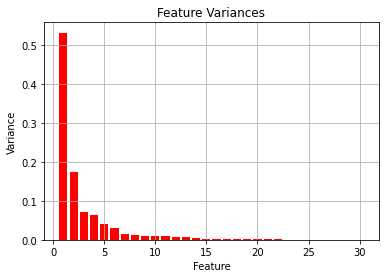

In [25]:
plt.title('Feature Variances')
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.grid()
plt.bar(range(1,31), pca.explained_variance_ratio_, color='r')

In [26]:
x_pca.shape

(569, 30)

### Select only one principal component

In [57]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x_scaled)

In [58]:
x_pca.shape

(569, 5)

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_pca, y, random_state=0, stratify=y)

In [60]:
x_train.shape

(426, 5)

In [61]:
x_test.shape

(143, 5)

In [62]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [63]:
accuracy_score(y_test, y_pred)

0.9370629370629371